Displaying the original image


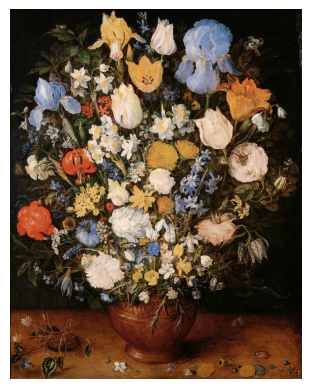



Converting image from uint8 to float32 and displaying


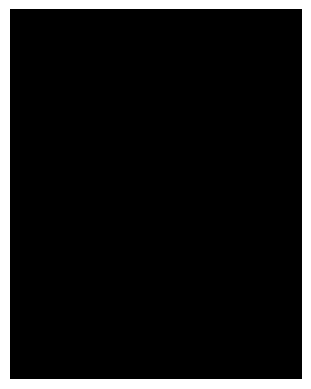



Converting image from float32 to uint8 and displaying


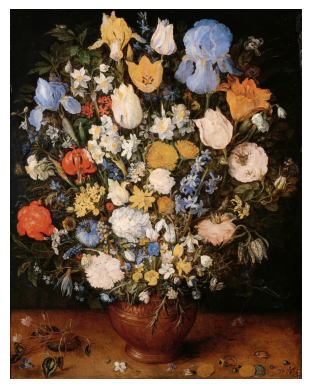



Displaying the cropped image (50, 50, 200, 200)


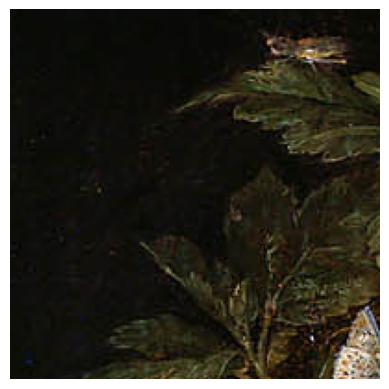



Displaying image scaled by half using numpy


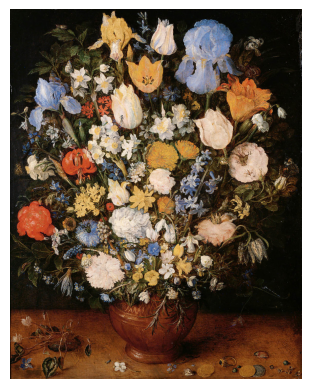



Displaying image scaled by half using cv


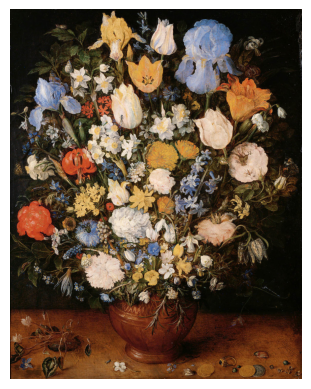



Displaying horizontal mirror of the image


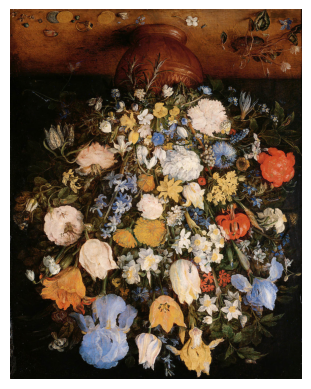



Displaying image rotated counterclockwise by 90 degrees


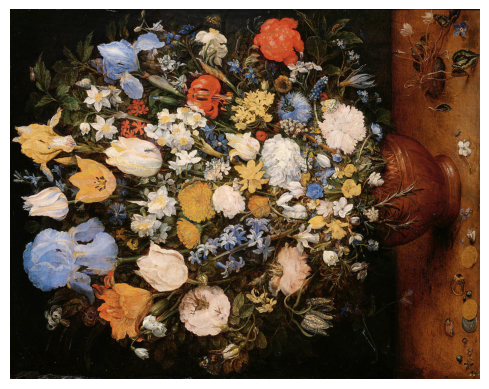



Displaying image with blue and red channels swapped


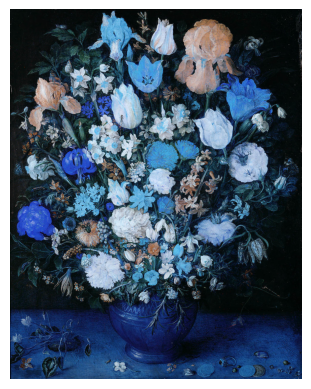



Displaying only the blue channel of the image


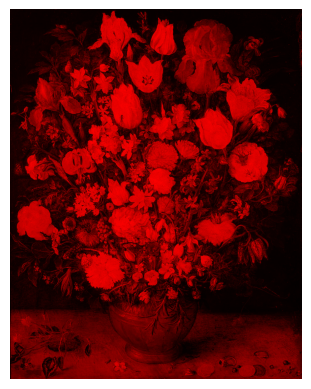



Displaying only the green channel of the image


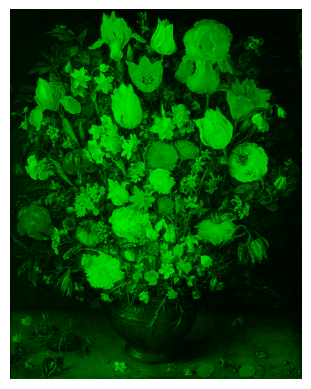



Displaying only the red channel of the image


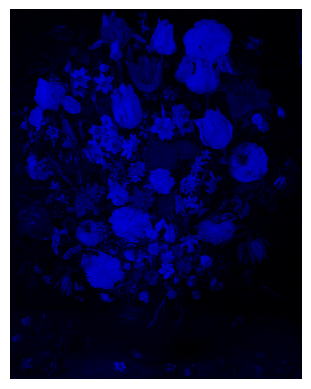



Displaying image with scaled saturation


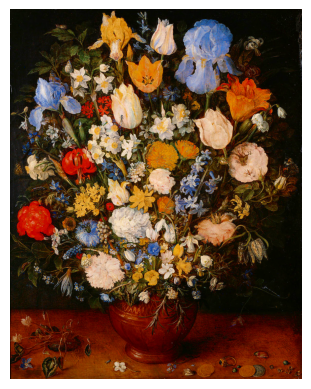



Displaying grayscale image


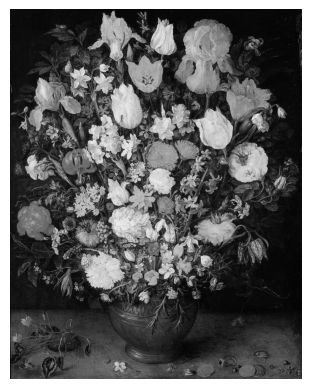



Displaying tiled image with RGB channels


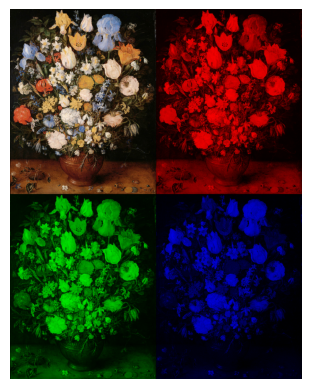

In [11]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def show_image(image):
    img = image
    if type(image) == str:
        img = mpimg.imread(image)  # Replace with your image path
    plt.imshow(img)
    plt.axis("off")  # Hide axis labels
    plt.show()

def uint8_to_float(image: np.ndarray) -> np.ndarray:
    """Convert image with uint8 values [0, 255] to float32 values [0, 1]."""
    return image / 255.0


def float_to_uint8(image: np.ndarray) -> np.ndarray:
    """Convert image with float32 values [0, 1] to uint8 values [0, 255], clipping values."""
    return (image * 255.0).astype(np.uint8)


def crop(image: np.ndarray, x: int, y: int, w: int, h: int) -> np.ndarray:
    """Crop image to the given rectangle, considering black pixels outside bounds."""
    shape = image.shape
    crop = np.ndarray((w, h, 3))
    for i in range(w):
        for j in range(h):
            if x+i < shape[0] and y+j < shape[1] and x+i >= 0 and y+j >= 0:
                crop[i][j] = image[x+i][y+j]
            else:
                crop[i][j] = np.zeros((3))
    return crop


def scale_by_half_using_numpy(image: np.ndarray) -> np.ndarray:
    """Scale image by half using numpy slicing."""
    shape = image.shape
    half = np.ndarray((shape[0] // 2, shape[1] // 2, 3))

    for i in range(half.shape[0]):
        for j in range(half.shape[1]):
            half[i][j] = image[i * 2][j * 2]
    return half

def scale_by_half_using_cv(image: np.ndarray) -> np.ndarray:
    """Scale image by half using cv.resize."""

    height, width = image.shape[:2]
    scaled_image = cv2.resize(image, (width // 2, height // 2))

    return scaled_image


def horizontal_mirror_image(image: np.ndarray) -> np.ndarray:
    """Flip image horizontally (mirror image)."""
    flip = np.ndarray(image.shape)
    sh = image.shape
    for i in range(sh[0]):
        for j in range(sh[1]):
            flip[i][j] = image[sh[0] - i - 1][sh[1] - 1 - j]
    return flip


def rotate_counterclockwise_90(image: np.ndarray) -> np.ndarray:
    """Rotate image counterclockwise by 90 degrees."""
    sh = image.shape
    rot = np.ndarray((sh[1], sh[0], 3))
    for i in range(sh[0]):
        for j in range(sh[1]):
            rot[j][i] = image[i][j]
    return rot


def swap_b_r(image: np.ndarray) -> np.ndarray:
    """Swap the blue and red channels of the image."""
    sh = image.shape
    swap = np.ndarray(sh)
    for i in range(sh[0]):
        for j in range(sh[1]):
            swap[i][j] = [image[i][j][2], image[i][j][1], image[i][j][0]]
    return swap


def blues(image: np.ndarray) -> np.ndarray:
    """Extract and return only the blue channel of the image."""
    sh = image.shape
    blue = np.ndarray(sh)
    for i in range(sh[0]):
        for j in range(sh[1]):
            blue[i][j] = [image[i][j][0], 0, 0]
    return blue


def greens(image: np.ndarray) -> np.ndarray:
    """Extract and return only the green channel of the image."""
    sh = image.shape
    green = np.ndarray(sh)
    for i in range(sh[0]):
        for j in range(sh[1]):
            green[i][j] = [0, image[i][j][1], 0]
    return green


def reds(image: np.ndarray) -> np.ndarray:
    """Extract and return only the red channel of the image."""
    sh = image.shape
    red = np.ndarray(sh)
    for i in range(sh[0]):
        for j in range(sh[1]):
            red[i][j] = [0, 0, image[i][j][2]]
    return red


def scale_saturation(image: np.ndarray, scale: float) -> np.ndarray:
    """Scale the saturation of the image."""
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    hsv[..., 1] = np.clip(hsv[..., 1] * scale, 0, 255)
    return cv.cvtColor(hsv, cv.COLOR_HSV2BGR)


def grayscale(image: np.ndarray) -> np.ndarray:
    """Convert image to grayscale using numpy."""
    greyscale = np.ndarray(image.shape)
    weights = np.array([0.2989, 0.5870, 0.1140])
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            greyscale[i][j] = np.dot(image[i][j], weights)
    return greyscale


def tile_bgr(image: np.ndarray) -> np.ndarray:
    """Tile the image with red, green, blue, and original channels."""
    red = reds(image)
    green = greens(image)
    blue = blues(image)
    sh = image.shape
    tile = np.ndarray((2 * sh[0], 2 * sh[1], 3))

    for i in range(sh[0]):
        for j in range(sh[1]):
            tile[i][j] = image[i][j]
            tile[i][j + sh[1]] = blue[i][j]
            tile[i + sh[0]][j] = green[i][j]
            tile[i + sh[0]][j + sh[1]] = red[i][j]
    return tile

def main():
    # Set up the image path
    img_path = "filters/src/bouquet.png"
    image = plt.imread(img_path)

    # Display original image
    print("Displaying the original image")
    show_image(image)
    print("\n")

    # uint8_to_float
    print("Converting image from uint8 to float32 and displaying")
    show_image(uint8_to_float(image))
    print("\n")

    # float_to_uint8
    print("Converting image from float32 to uint8 and displaying")
    show_image(float_to_uint8(image))
    print("\n")

    # crop
    print("Displaying the cropped image (50, 50, 200, 200)")
    show_image(crop(image, 50, 50, 200, 200))
    print("\n")

    # scale by half using numpy
    print("Displaying image scaled by half using numpy")
    show_image(scale_by_half_using_numpy(image))
    print("\n")

    # scale by half using cv
    print("Displaying image scaled by half using cv")
    show_image(scale_by_half_using_cv(image))
    print("\n")

    # horizontal mirror
    print("Displaying horizontal mirror of the image")
    show_image(horizontal_mirror_image(image))
    print("\n")

    # rotate counterclockwise by 90 degrees
    print("Displaying image rotated counterclockwise by 90 degrees")
    show_image(rotate_counterclockwise_90(image))
    print("\n")

    # swap blue and red channels
    print("Displaying image with blue and red channels swapped")
    show_image(swap_b_r(image))
    print("\n")

    # show blue channel only
    print("Displaying only the blue channel of the image")
    show_image(blues(image))
    print("\n")

    # show green channel only
    print("Displaying only the green channel of the image")
    show_image(greens(image))
    print("\n")

    # show red channel only
    print("Displaying only the red channel of the image")
    show_image(reds(image))
    print("\n")

    # scale saturation
    print("Displaying image with scaled saturation")
    show_image(scale_saturation(image, 1.5))
    print("\n")

    # grayscale image
    print("Displaying grayscale image")
    show_image(grayscale(image))
    print("\n")

    # tile image with RGB channels
    print("Displaying tiled image with RGB channels")
    show_image(tile_bgr(image))
    print("\n")


# Run the main function to display results
main()
